# 6-4. WEAT 구현하기 

In [1]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

In [2]:
target_X = {
    '장미': [4.1, 1.2, -2.4, 0.5, 4.1],
    '튤립': [3.1, 0.5, 3.6, 1.7, 5.8],
    '백합': [2.9, -1.3, 0.4, 1.1, 3.7],
    '데이지': [5.4, 2.5, 4.6, -1.0, 3.6]
}
target_Y = {
    '거미': [-1.5, 0.2, -0.6, -4.6, -5.3],
    '모기': [0.4, 0.7, -1.9, -4.5, -2.9],
    '파리': [0.9, 1.4, -2.3, -3.9, -4.7],
    '메뚜기': [0.7, 0.9, -0.4, -4.1, -3.9]
}
attribute_A = {
    '사랑':[2.8,  4.2, 4.3,  0.3, 5.0],
    '행복':[3.8,  3. , -1.2,  4.4, 4.9],
    '웃음':[3.7, -0.3,  1.2, -2.5, 3.9]
}
attribute_B = {
    '재난': [-0.2, -2.8, -4.7, -4.3, -4.7],
    '고통': [-4.5, -2.1,  -3.8, -3.6, -3.1],
    '증오': [-3.6, -3.3, -3.5,  -3.7, -4.4]
}

In [3]:
X = np.array([v for v in target_X.values()])
Y = np.array([v for v in target_Y.values()])
print(X)
print(Y)

[[ 4.1  1.2 -2.4  0.5  4.1]
 [ 3.1  0.5  3.6  1.7  5.8]
 [ 2.9 -1.3  0.4  1.1  3.7]
 [ 5.4  2.5  4.6 -1.   3.6]]
[[-1.5  0.2 -0.6 -4.6 -5.3]
 [ 0.4  0.7 -1.9 -4.5 -2.9]
 [ 0.9  1.4 -2.3 -3.9 -4.7]
 [ 0.7  0.9 -0.4 -4.1 -3.9]]


In [4]:
A = np.array([v for v in attribute_A.values()])
B = np.array([v for v in attribute_B.values()])
print(A)
print(B)

[[ 2.8  4.2  4.3  0.3  5. ]
 [ 3.8  3.  -1.2  4.4  4.9]
 [ 3.7 -0.3  1.2 -2.5  3.9]]
[[-0.2 -2.8 -4.7 -4.3 -4.7]
 [-4.5 -2.1 -3.8 -3.6 -3.1]
 [-3.6 -3.3 -3.5 -3.7 -4.4]]


In [5]:
def cos_sim(i,j):
    return dot(i,j.T)/(norm(i)*norm(j))

def s(w,A,B):
    c_a = cos_sim(w,A)
    c_b = cos_sim(w,B)
    mean_A = np.mean(c_a,axis=-1)
    mean_B = np.mean(c_b,axis=-1)
    return mean_A - mean_B

print(s(target_X['장미'],A,B))

0.6457646122337399


In [6]:
print(s(target_Y['거미'],A,B))

-0.794002342033094


In [7]:
print(s(X,A,B))

[0.29551989 0.51723181 0.26499096 0.50924109]


In [8]:
print(round(np.mean(s(X,A,B)),3))

0.397


In [9]:
print(round(np.mean(s(Y,A,B)),3))

-0.33


In [10]:
def weat_score(X,Y,A,B):
    s_X = s(X,A,B)
    s_Y = s(Y,A,B)
    
    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X,s_Y],axis=0))
    
    return (mean_X - mean_Y) / std_dev

print(round(weat_score(X,Y,A,B),3))

1.932


### 시각적으로 확인해보기 

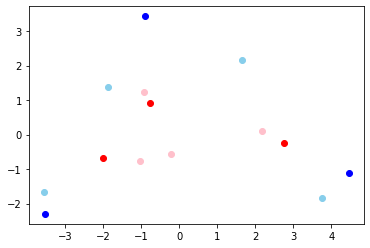

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc_A = pca.fit_transform(A)
pc_B = pca.fit_transform(B)
pc_X = pca.fit_transform(X)
pc_Y = pca.fit_transform(Y)

import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.scatter(pc_A[:,0],pc_A[:,1],c='blue',label='A')
ax.scatter(pc_B[:,0],pc_B[:,1],c='red',label='B')
ax.scatter(pc_X[:,0],pc_X[:,1],c='skyblue',label='X')
ax.scatter(pc_Y[:,0],pc_Y[:,1],c='pink',label='Y')

# 6-5. 사전학습된 Word Embedding에 WEAT 적용

In [12]:
model_dir = './data/GoogleNews-vectors-negative300.bin'
from gensim.models import KeyedVectors

w2v = KeyedVectors.load_word2vec_format(model_dir,binary=True,limit=500000)

In [13]:
w2v

In [14]:
print(len(w2v.index_to_key))
print(len(w2v['I']))
print(w2v.vectors.shape)

500000
300
(500000, 300)


In [15]:
w2v['happy']

array([-5.18798828e-04,  1.60156250e-01,  1.60980225e-03,  2.53906250e-02,
        9.91210938e-02, -8.59375000e-02,  3.24218750e-01, -2.17285156e-02,
        1.34765625e-01,  1.10351562e-01, -1.04980469e-01, -2.90527344e-02,
       -2.38037109e-02, -4.02832031e-02, -3.68652344e-02,  2.32421875e-01,
        3.20312500e-01,  1.01074219e-01,  5.83496094e-02, -2.91824341e-04,
       -3.29589844e-02,  2.11914062e-01,  4.32128906e-02, -8.59375000e-02,
        2.81250000e-01, -1.78222656e-02,  3.79943848e-03, -1.71875000e-01,
        2.06054688e-01, -1.85546875e-01,  3.73535156e-02, -1.21459961e-02,
        2.04101562e-01, -3.80859375e-02,  3.61328125e-02, -8.15429688e-02,
        8.44726562e-02,  9.37500000e-02,  1.44531250e-01,  7.42187500e-02,
        2.51953125e-01, -7.91015625e-02,  8.69140625e-02,  1.58691406e-02,
        1.09375000e-01, -2.23632812e-01, -5.15747070e-03,  1.68945312e-01,
       -1.36718750e-01, -2.51464844e-02, -3.85742188e-02, -1.33056641e-02,
        1.38671875e-01,  

In [16]:
w2v.most_similar(positive=['happy'])

[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

In [17]:
w2v.most_similar(positive=['family'])

[('relatives', 0.6662653088569641),
 ('familiy', 0.6517067551612854),
 ('families', 0.6252894997596741),
 ('siblings', 0.6140849590301514),
 ('friends', 0.6128394603729248),
 ('mother', 0.6065612435340881),
 ('aunt', 0.5811319947242737),
 ('grandparents', 0.5762072205543518),
 ('father', 0.5717043876647949),
 ('Family', 0.5672314763069153)]

In [18]:
w2v.most_similar(positive=['school'])

[('elementary', 0.7868632078170776),
 ('schools', 0.7411909103393555),
 ('elementary_schools', 0.6597153544425964),
 ('kindergarten', 0.6529811024665833),
 ('eighth_grade', 0.6488089561462402),
 ('School', 0.6477997303009033),
 ('teacher', 0.63824063539505),
 ('students', 0.6301522850990295),
 ('classroom', 0.6281620264053345),
 ('Schools', 0.6172096133232117)]

In [19]:
target_X = ['science', 'technology', 'physics', 'chemistry', 'Einstein', 'NASA', 'experiment', 'astronomy']
target_Y = ['poetry', 'art', 'Shakespeare', 'dance', 'literature', 'novel', 'symphony', 'drama']
attribute_A = ['brother', 'father', 'uncle', 'grandfather', 'son', 'he', 'his', 'him']
attribute_B = ['sister', 'mother', 'aunt', 'grandmother', 'daughter', 'she', 'hers', 'her']

X = np.array([w2v[word] for word in target_X])
Y = np.array([w2v[word] for word in target_Y])
A = np.array([w2v[word] for word in attribute_A])
B = np.array([w2v[word] for word in attribute_B])

weat_score(X, Y, A, B)

1.2624874

In [20]:
target_X = ['pizza', 'coke', 'hamburger', 'ham', 'ramen', 'icecream', 'candy']
target_Y = ['salad', 'fruit', 'vegetable', 'herb', 'root', 'greens', 'wholesome']
attribute_A = ['junk', 'canned', 'convenience', 'frozen', 'fast']
attribute_B = ['health', 'beneficial', 'good', 'nourishing', 'nutritious']

X = np.array([w2v[word] for word in target_X])
Y = np.array([w2v[word] for word in target_Y])
A = np.array([w2v[word] for word in attribute_A])
B = np.array([w2v[word] for word in attribute_B])

weat_score(X, Y, A, B)

1.6909266

In [21]:
target_X = ['pizza', 'coke', 'hamburger', 'ham', 'ramen', 'icecream', 'candy']
target_Y = ['salad', 'fruit', 'vegetable', 'herb', 'root', 'greens', 'wholesome']
attribute_A = ['book', 'essay', 'dictionary', 'magazine', 'novel']
attribute_B = ['news', 'report', 'statement', 'broadcast', 'word']

X = np.array([w2v[word] for word in target_X])
Y = np.array([w2v[word] for word in target_Y])
A = np.array([w2v[word] for word in attribute_A])
B = np.array([w2v[word] for word in attribute_B])

weat_score(X, Y, A, B)

-0.05137869

In [22]:
target_X = ["history","origin",'legend',"modern","historical"]
target_Y = ["detail",'sensitive','accurate','careful','selfless']
attribute_A = ['brother', 'father', 'uncle', 'grandfather', 'son', 'he', 'his', 'him']
attribute_B = ['sister', 'mother', 'aunt', 'grandmother', 'daughter', 'she', 'hers', 'her']

X = np.array([w2v[word] for word in target_X])
Y = np.array([w2v[word] for word in target_Y])
A = np.array([w2v[word] for word in attribute_A])
B = np.array([w2v[word] for word in attribute_B])

weat_score(X, Y, A, B)

0.4825992

In [23]:
#메모리를 다시 비워줍시다.
del w2v
print("삭제 완료")

삭제 완료


# 6-6. 직접 만드는 Word Embedding에 WEAT 적용(1)

### 형태소 분석기를 이용하여 품사가 명사인 경우, 해당 단어를 추출하기

In [24]:
import os
from konlpy.tag import Okt
okt = Okt()
with open("./data/synopsis/synopsis.txt",'r') as file:
    for i in range(1):
        line = file.readline()
        word = okt.pos(line,stem=True,norm=True)
        print(word)
        #print(file.readline(),end='')
        

[('사운드', 'Noun'), ('엔지니어', 'Noun'), ('상우', 'Noun'), ('(', 'Punctuation'), ('유지태', 'Noun'), ('분', 'Noun'), (')', 'Punctuation'), ('늘다', 'Verb'), ('치매', 'Noun'), ('에', 'Josa'), ('걸리다', 'Verb'), ('할머니', 'Noun'), ('(', 'Punctuation'), ('백성희', 'Noun'), ('분', 'Noun'), (')', 'Punctuation'), ('오다', 'Verb'), ('\n', 'Foreign')]


In [25]:
from konlpy.tag import Okt
okt = Okt()
tokenized = []
with open("./data/synopsis/synopsis.txt",'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = okt.pos(line, stem=True, norm=True)
        res = []
        for w in words:
            if w[1] in ["Noun"]:      # "Adjective", "Verb" 등을 포함할 수도 있습니다.
                res.append(w[0])    # 명사일 때만 tokenized 에 저장하게 됩니다. 
        tokenized.append(res)

print("슝~")

슝~


In [26]:
print(len(tokenized))

71156


In [27]:
tokenized[:3]
#명사만 골라서 토큰으로 만들었다. 

[['사운드', '엔지니어', '상우', '유지태', '분', '치매', '할머니', '백성희', '분'],
 ['시절', '상처', '아버지', '박인환', '분', '고모', '신신애', '분', '살'],
 ['겨울', '그', '지방', '방송국', '라디오', '은수', '이영애', '분', '를']]

### 추출된 결과로 embedding model 만들기

In [28]:
from gensim.models import Word2Vec

model = Word2Vec(tokenized,vector_size=100,window=5,min_count=3,sg=0)
model.wv.most_similar(positive=['영화'])

[('작품', 0.8832857608795166),
 ('다큐멘터리', 0.8551143407821655),
 ('드라마', 0.8190868496894836),
 ('영화로', 0.8055230975151062),
 ('차이밍량', 0.7864207029342651),
 ('형식', 0.7813020944595337),
 ('코미디', 0.77657151222229),
 ('주제', 0.7721237540245056),
 ('소재', 0.7712924480438232),
 ('스토리', 0.7644290924072266)]

In [29]:
model.wv.most_similar(positive=['사랑'])

[('첫사랑', 0.7006891965866089),
 ('하은', 0.689112663269043),
 ('행복', 0.6783649921417236),
 ('진심', 0.6775755286216736),
 ('덕훈', 0.670796275138855),
 ('만인', 0.670369565486908),
 ('연애', 0.6652839183807373),
 ('이별', 0.6621940732002258),
 ('만남', 0.6548107266426086),
 ('가슴', 0.6532548069953918)]

In [30]:
model.wv.most_similar(positive=['연극'])
#선택한 단어와 유사한 단어 뽑아내기 

[('시나리오', 0.8982678055763245),
 ('영화감독', 0.8927478194236755),
 ('영감', 0.8866177797317505),
 ('배우', 0.8840557932853699),
 ('각색', 0.8740944862365723),
 ('예술', 0.8638562560081482),
 ('캐스팅', 0.8638441562652588),
 ('영화로', 0.8616122603416443),
 ('공연', 0.8605164885520935),
 ('예술가', 0.8531793355941772)]

### TF/IDF로 해당 데이터를 가장 잘 표현하는 단어 셋 만들기

In [31]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from konlpy.tag import Okt

art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

def read_token(file_name):
    okt = Okt()
    result = []
    with open('./data/synopsis/'+file_name, 'r') as fread: 
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline() 
            if not line: break 
            tokenlist = okt.pos(line, stem=True, norm=True) 
            for word in tokenlist:
                if word[1] in ["Noun"]:#, "Adjective", "Verb"]:
                    result.append((word[0])) 
    return ' '.join(result)

print("슝~")

슝~


In [32]:
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


In [33]:
print(art[:100])

사운드 엔지니어 상우 유지태 분 치매 할머니 백성희 분 시절 상처 아버지 박인환 분 고모 신신애 분 살 겨울 그 지방 방송국 라디오 은수 이영애 분 를 자연 소리 채집 라디오 프로


In [35]:
import pandas as pd
vectorizer = TfidfVectorizer(smooth_idf=True) 
X = vectorizer.fit_transform([art,gen])
tfidf_ = pd.DataFrame(X.toarray()) #데이터프레임으로 표현하기 
tfidf_

#사실 lsa를 이용하려고 했었는데 지금은 문서가 2개밖에 없어서 토픽 모델링이 제대로 안되지 않을까?

,0,1,2,3,4,5,6,7,8,9,...,41072,41073,41074,41075,41076,41077,41078,41079,41080,41081
0,0.000000,0.000363,0.000000,0.000363,0.016684,0.000907,0.000181,0.000000,0.000181,0.000000,...,0.000255,0.000181,0.000000,0.000181,0.000000,0.000000,0.001813,0.000000,0.000255,0.000000
1,0.001498,0.000076,0.000053,0.000343,0.019941,0.001066,0.000038,0.000053,0.000304,0.000053,...,0.000000,0.000076,0.000107,0.000228,0.000053,0.000053,0.001104,0.000053,0.000000,0.000053


# TF-IDF는 기본적으로 단어의 빈도 수를 이용한 수치화 방법이기 때문에 단어의 의미를 고려하지 못한다는 단점이 있었습니다.
-> lsa 이용해서 단어의 의미를 고려해서 단어셋 선정하기(로 하려고 했으나 그냥 tf-idf 이용하라고 하네요...)
tf-idf는 dtm을 기반으로 다른 문서에서는 자주 보이지 않고 해당 문서에서만 자주 나오는 단어를 뽑아낼 수 있다고 하는데 이건 의미적으로 이 단어가 이 문서에서 제일 중요하다고 말할수는 없지 않을까요?
nlp를 통해서 상위의 개념을 추출할 수는 없을까요? 

In [36]:
print(vectorizer.vocabulary_['영화'])
print(vectorizer.get_feature_names()[23976])

23976
영화


/Users/songye/opt/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [37]:
m1 = X[0].tocoo()
print(m1)
m2 = X[1].tocoo()

w1 = [[i,j] for i,j in zip(m1.col,m1.data)]
w2 = [[i,j] for i,j in zip(m2.col,m2.data)]

w1.sort(key=lambda x : x[1],reverse=True)
w2.sort(key=lambda x : x[1],reverse=True)

print("예술영화를 대표하는 단어들 : ") #어떻게 대표할 수 있을까? 이걸 대표한다고 말해도 되는건가?
for i in range(100):
    print(vectorizer.get_feature_names() [w1[i][0]],end=',')
    
print('\n')
print("일반영화를 대표하는 단어들 : ")
for i in range(100):
    print(vectorizer.get_feature_names()[w2[i][0]], end=', ')

  (0, 24288)	0.0001813433827312183
  (0, 30456)	0.0001813433827312183
  (0, 11824)	0.00025487179701503193
  (0, 20957)	0.00025487179701503193
  (0, 23539)	0.0001813433827312183
  (0, 15055)	0.0005440301481936549
  (0, 22947)	0.00025487179701503193
  (0, 19974)	0.0001813433827312183
  (0, 22314)	0.0001813433827312183
  (0, 36911)	0.0005097435940300639
  (0, 36545)	0.0001813433827312183
  (0, 16222)	0.00025487179701503193
  (0, 870)	0.0001813433827312183
  (0, 10861)	0.0001813433827312183
  (0, 22324)	0.0001813433827312183
  (0, 5551)	0.0001813433827312183
  (0, 14795)	0.0001813433827312183
  (0, 17245)	0.0001813433827312183
  (0, 7774)	0.0001813433827312183
  (0, 36535)	0.00025487179701503193
  (0, 6081)	0.0001813433827312183
  (0, 17587)	0.0001813433827312183
  (0, 33441)	0.0001813433827312183
  (0, 23952)	0.0001813433827312183
  (0, 3794)	0.0007646153910450958
  :	:
  (0, 5484)	0.0023574639755058377
  (0, 30736)	0.03717539345989975
  (0, 37858)	0.00743507869197995
  (0, 32086)	0.00036

In [38]:
#위에서 뽑은 100개의 단어 중에서 중복을 제거하고 15개의 단어를 선택하는 과정
n = 15
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names()[w2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 15개 추출한다.
target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break 

# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 15개 추출한다.
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

In [39]:
print(target_art)
print(target_gen)

['아빠', '음악', '결심', '운명', '지금', '여인', '이름', '이후', '준비', '감정', '만난', '처음', '충격', '누구', '그린']
['서울', '애니메이션', '여성', '가지', '주인공', '대해', '연출', '사회', '다큐멘터리', '부문', '섹스', '바로', '의도', '계획', '정체']


In [ ]:
target_art = ['음악','결심','운명','지금','이후']
target_gen = ['여성','주인공','사회','계획','정체']

In [44]:
genre_txt = ['synopsis_action.txt', 'synopsis_adult.txt', 'synopsis_adventure.txt', 'synopsis_animation.txt', 'synopsis_comedy.txt', 'synopsis_crime.txt','synopsis_documentary.txt','synopsis_drama.txt','synopsis_etc.txt','synopsis_family.txt','synopsis_fantasy.txt','synopsis_historical.txt','synopsis_horror.txt','synopsis_musical.txt','synopsis_mystery.txt','synopsis_romance.txt','synopsis_SF.txt','synopsis_show.txt','synopsis_thriller.txt','synopsis_war.txt','synopsis_western.txt']
genre_name = ['액션', '성인','모험','애니메이션','코메디','범죄','다큐멘터리','드라마','기타','가족','판타지','역사','호러','뮤지컬','미스테리','로맨스','SF','쇼','스릴러','전쟁','서부극']

In [45]:
from tqdm import tqdm
genre = []
for file_name in tqdm(genre_txt):
    genre.append(read_token(file_name))

  0%|                                                                                                                   | 0/21 [00:00<?, ?it/s]

synopsis_action.txt 파일을 읽고 있습니다.


  5%|█████                                                                                                      | 1/21 [00:57<19:14, 57.70s/it]

synopsis_adult.txt 파일을 읽고 있습니다.


 10%|██████████▏                                                                                                | 2/21 [01:24<12:35, 39.75s/it]

synopsis_adventure.txt 파일을 읽고 있습니다.


 14%|███████████████▎                                                                                           | 3/21 [01:29<07:10, 23.93s/it]

synopsis_animation.txt 파일을 읽고 있습니다.


 19%|████████████████████▍                                                                                      | 4/21 [02:39<11:51, 41.87s/it]

synopsis_comedy.txt 파일을 읽고 있습니다.


 24%|█████████████████████████▍                                                                                 | 5/21 [03:34<12:29, 46.83s/it]

synopsis_crime.txt 파일을 읽고 있습니다.


 29%|██████████████████████████████▌                                                                            | 6/21 [03:51<09:06, 36.42s/it]

synopsis_documentary.txt 파일을 읽고 있습니다.


 33%|███████████████████████████████████▋                                                                       | 7/21 [05:20<12:32, 53.73s/it]

synopsis_drama.txt 파일을 읽고 있습니다.


 38%|████████████████████████████████████████▍                                                                 | 8/21 [09:18<24:20, 112.33s/it]

synopsis_etc.txt 파일을 읽고 있습니다.


 43%|█████████████████████████████████████████████▊                                                             | 9/21 [09:54<17:42, 88.58s/it]

synopsis_family.txt 파일을 읽고 있습니다.


 48%|██████████████████████████████████████████████████▍                                                       | 10/21 [10:01<11:34, 63.18s/it]

synopsis_fantasy.txt 파일을 읽고 있습니다.


 52%|███████████████████████████████████████████████████████▌                                                  | 11/21 [10:07<07:39, 45.95s/it]

synopsis_historical.txt 파일을 읽고 있습니다.


 57%|████████████████████████████████████████████████████████████▌                                             | 12/21 [10:09<04:52, 32.46s/it]

synopsis_horror.txt 파일을 읽고 있습니다.


 62%|█████████████████████████████████████████████████████████████████▌                                        | 13/21 [10:40<04:15, 31.99s/it]

synopsis_musical.txt 파일을 읽고 있습니다.


 67%|██████████████████████████████████████████████████████████████████████▋                                   | 14/21 [10:42<02:39, 22.85s/it]

synopsis_mystery.txt 파일을 읽고 있습니다.


 71%|███████████████████████████████████████████████████████████████████████████▋                              | 15/21 [10:49<01:49, 18.30s/it]

synopsis_romance.txt 파일을 읽고 있습니다.


 76%|████████████████████████████████████████████████████████████████████████████████▊                         | 16/21 [11:41<02:21, 28.23s/it]

synopsis_SF.txt 파일을 읽고 있습니다.


 81%|█████████████████████████████████████████████████████████████████████████████████████▊                    | 17/21 [11:51<01:31, 22.91s/it]

synopsis_show.txt 파일을 읽고 있습니다.


 86%|██████████████████████████████████████████████████████████████████████████████████████████▊               | 18/21 [11:56<00:51, 17.31s/it]

synopsis_thriller.txt 파일을 읽고 있습니다.


 90%|███████████████████████████████████████████████████████████████████████████████████████████████▉          | 19/21 [12:17<00:37, 18.51s/it]

synopsis_war.txt 파일을 읽고 있습니다.


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 20/21 [12:21<00:14, 14.24s/it]

synopsis_western.txt 파일을 읽고 있습니다.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [12:22<00:00, 35.33s/it]


In [46]:
#각 장르별 시놉시스 텍스트에 대한 tf-idf 만들기 
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)
print(X.shape)

(21, 42191)


In [47]:
#만들어진 tf-idf를 이용해서 각 장르를 대표하는 단어셋 찾기 
#단어를 15개 찾아주기 
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names()[w[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names()[w[i][j][0]])
            print(vectorizer.get_feature_names()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

액션: 위해, 자신, 

/Users/songye/opt/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


시작, 조직, 사건, 사람, 그녀, 경찰, 전쟁, 모든, 목숨, 사실, 친구, 가족, 요원, 
성인: 그녀, 남편, 마사지, 자신, 섹스, 관계, 영화, 정사, 남자, 위해, 시작, 여자, 유부녀, 마음, 사랑, 
모험: 위해, 자신, 시작, 친구, 마을, 아버지, 영화, 아이, 사람, 여행, 세계, 앤트, 세상, 가족, 모험, 
애니메이션: 애니메이션, 국제, 영화제, 친구, 인디애니페스트, 위해, 자신, 시작, 사람, 페스티벌, 서울, 이야기, 아이, 마을, 소녀, 
코메디: 그녀, 자신, 시작, 위해, 사랑, 사람, 친구, 영화, 남자, 여자, 영화제, 가족, 과연, 마을, 사건, 
범죄: 사건, 위해, 자신, 경찰, 시작, 그녀, 범죄, 조직, 살인, 사람, 마약, 형사, 남자, 모든, 살해, 
다큐멘터리: 영화제, 영화, 다큐, 국제, 다큐멘터리, 사람, 이야기, 대한, 자신, 감독, 위해, 서울, 우리, 시작, 세계, 
드라마: 자신, 영화제, 그녀, 사람, 사랑, 영화, 위해, 시작, 국제, 남자, 친구, 이야기, 엄마, 여자, 아버지, 
기타: 영화제, 국제, 서울, 단편, 영화, 자신, 사람, 이야기, 그녀, 남자, 위해, 시작, 사랑, 뉴미디어, 페스티벌, 
가족: 엄마, 아빠, 가족, 영화제, 자신, 위해, 친구, 아주르, 아버지, 시작, 그녀, 아들, 국제, 마을, 낙타, 
판타지: 자신, 그녀, 시작, 위해, 사람, 사랑, 요괴, 영화제, 이야기, 영화, 소녀, 남자, 인간, 세상, 마을, 
역사: 조선, 위해, 시작, 신기전, 사랑, 자신, 아가멤논, 황제, 그녀, 루안, 최고, 사람, 운명, 하선, 전쟁, 
호러: 시작, 위해, 사람, 자신, 친구, 그녀, 사건, 공포, 발견, 죽음, 마을, 가족, 악령, 남자, 좀비, 
뮤지컬: 뮤지컬, 사랑, 에스메랄다, 그녀, 음악, 충무로, 모차르트, 영화, 토스카, 자신, 니웨, 카바, 영화제, 바흐, 페뷔스, 
미스테리: 사건, 그녀, 시작, 자신, 위해, 사람, 발견, 사고, 진실, 죽음

### embedding model과 단어 셋으로 WEAT score 구해보기

In [48]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

In [49]:
matrix

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0,

In [50]:
#art, gen을 타겟으로 삼기 
X = np.array([model.wv[word] for word in target_art])
Y = np.array([model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([model.wv[word] for word in attributes[i]])
        B = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X,Y,A,B) #이 부분에서 weat 스코어 계산해주기 
        
print("completed")

completed


In [51]:
for i in range(len(genre_name)-1):
    for j in range(i+1,len(genre_name)):
        print(genre_name[i],genre_name[j],matrix[i][j])

액션 성인 -0.37333557
액션 모험 -0.14760818
액션 애니메이션 0.48325965
액션 코메디 0.04002542
액션 범죄 0.35986513
액션 다큐멘터리 0.5963703
액션 드라마 0.027220802
액션 기타 0.47099096
액션 가족 -0.12889135
액션 판타지 0.22654001
액션 역사 -0.21014895
액션 호러 -0.54299825
액션 뮤지컬 0.46896616
액션 미스테리 -0.78580296
액션 로맨스 -0.7511152
액션 SF 0.44456226
액션 쇼 0.025821317
액션 스릴러 -0.5347538
액션 전쟁 0.53458995
액션 서부극 0.07653774
성인 모험 0.27753523
성인 애니메이션 0.7420825
성인 코메디 0.55781776
성인 범죄 0.4915562
성인 다큐멘터리 0.80671144
성인 드라마 0.5420326
성인 기타 0.79214144
성인 가족 0.28626677
성인 판타지 0.60161346
성인 역사 0.29646966
성인 호러 0.19757394
성인 뮤지컬 0.7687803
성인 미스테리 0.051620893
성인 로맨스 -0.8482401
성인 SF 0.5525682
성인 쇼 0.46231115
성인 스릴러 0.19601361
성인 전쟁 0.5955228
성인 서부극 0.42885277
모험 애니메이션 0.88690263
모험 코메디 0.3669065
모험 범죄 0.23626901
모험 다큐멘터리 0.9443739
모험 드라마 0.30304953
모험 기타 0.81136525
모험 가족 0.015020515
모험 판타지 0.78228426
모험 역사 -0.06555125
모험 호러 -0.17464851
모험 뮤지컬 0.8057428
모험 미스테리 -0.30275112
모험 로맨스 -0.5840789
모험 SF 0.80019677
모험 쇼 0.22633126
모험 스릴러 -0.12174743
모험 전쟁 0.6867033
모험 서

<AxesSubplot:>

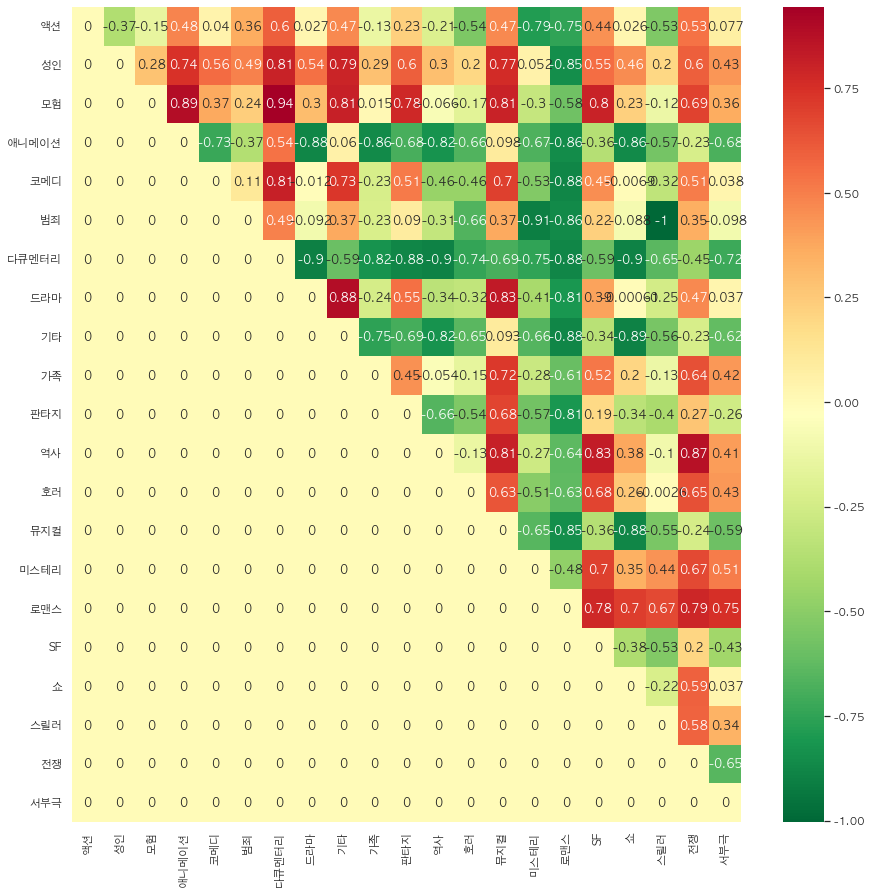

In [58]:
import numpy as np; 
import seaborn as sns; 

np.random.seed(0)
plt.figure(figsize=(15,15))

# 한글 지원 폰트
sns.set(font='AppleGothic')

# 마이너스 부호 

plt.rcParams['axes.unicode_minus'] = False

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r')
ax